# ResNet

기존 baseline 코드로 실험결과를 바탕으로 기본 설정을 결정했다. 
- Optimizer = Adam
- Criterion = FocalLoss
- Epochs = 20

### 01 ResNet 50

pretrained된 resnet50을 기본 설정으로 돌렸다.

optimizer:adam, criterion:focal, epochs:20

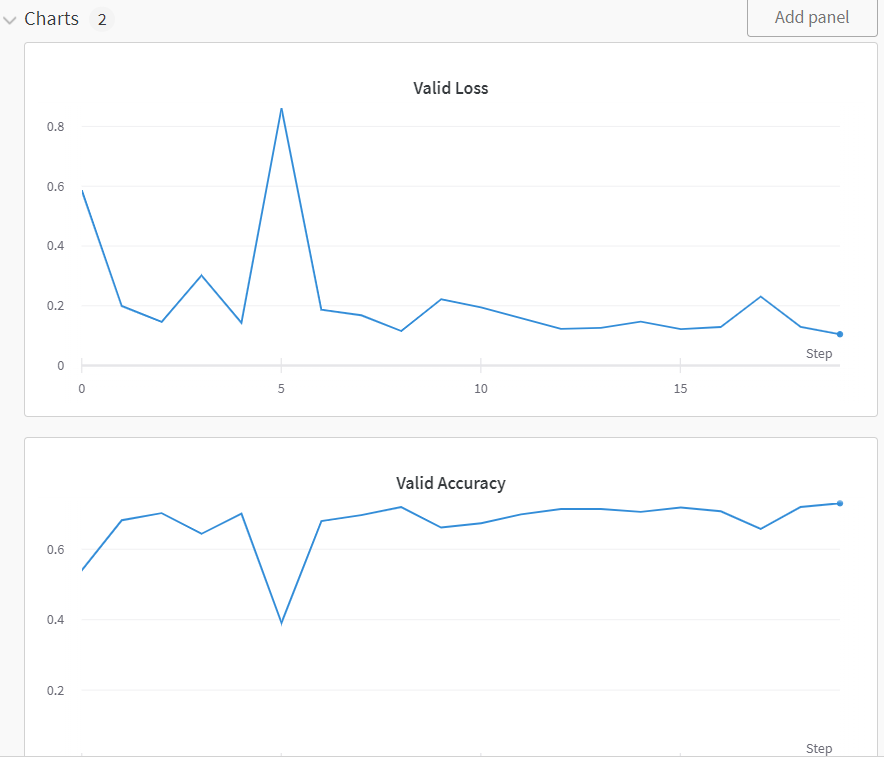

- 결과 : Train accuracy : 95% Train loss : 0.05 || Validation accuracy : 73% Validation loss : 0.1
- 확실히 baseline보다는 성능이 높은데, Train acc에 비해 validataion acc가 너무 낮다는 생각이 든다.
> 다음에 해볼 실험 
- epoch 증가
- Augmentation
- k-fold, stratified cross-validation

### 02 Epoch 30

Epochs:30, criterion:focal, optimizer:Adam

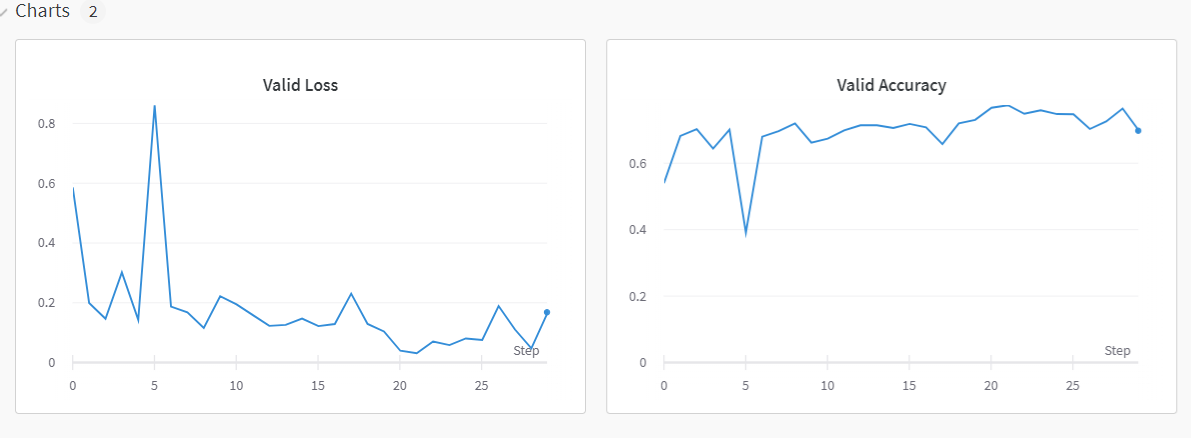

- 결과 : Train accuracy : 97% Train loss : 0.02 || (BEST) Validation accuracy : 77% Validation loss : 0.03
- Epoch 20과 큰 차이가 없다고 느껴진다.
- 리더보드 결과 18% (test.py 수정 전)
- test.py 수정 후 리더보드에 올려본 정확도 71%, F1 0.6201
> 다음에 해볼 실험 
- Augmentation
- k-fold, stratified cross-validation


### 03 MaskSplitByProfileDataset

k-fold, stratified cross-validatio에 대한 코드를 작성하기 전에 dataset.py를 살펴보다가 사람을 고려해서 Dataset를 나눈 코드를 발견해서 실행해보았다.

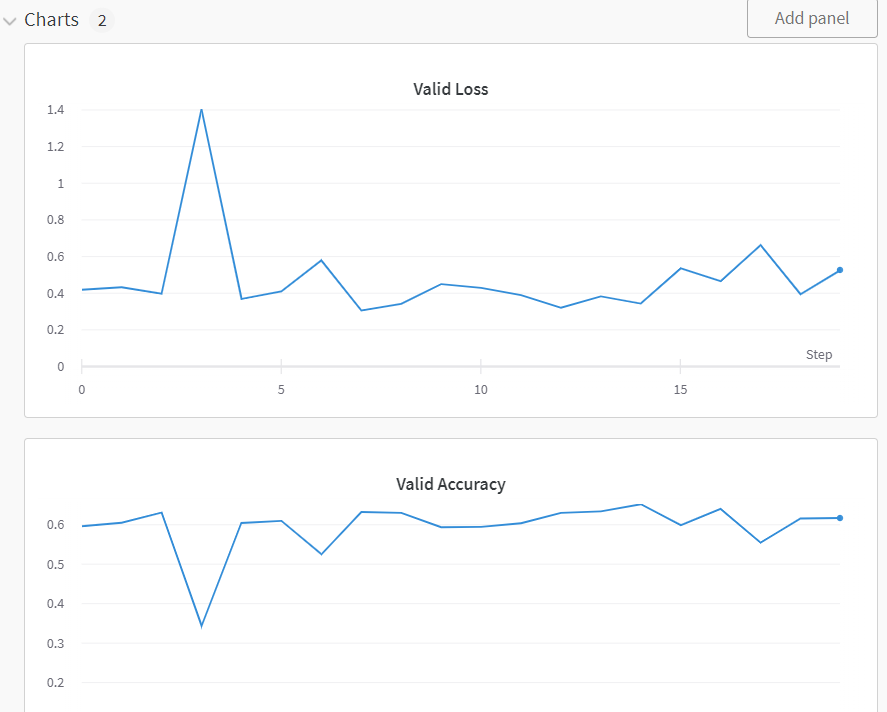

- 결과 : Train accuracy : 95% Train loss : 0.05 || Validation accuracy : 65% Validation loss : 0.31
- Train accuracy/loss만 확인했을땐 기본설정으로 학습한 코드와 크게 다르지 않다고 생각했는데, validation에서 꽤 큰 차이를 보였다. 하지만 둘다 Train, Validation acc의 차이가 큰 편이어서 overfitting이 일어난 것 같다는 생각이 든다. 먼저 overfitting을 줄이기 위한 실험을 진행해야할 것 같다.
 
> 다음에 해볼 실험 
- k-fold
- stratified cross-validation

### 04 모델 수정

........ 올려보고 결과에 너무 놀라서 k-fold 해보기 전에 모델 수정부터 해봤다. 이전에는 Resnet의 마지막 FC layer 자체를 바꿨었는데, 이번에는 이어서 붙이는 형식으로 진행했다.

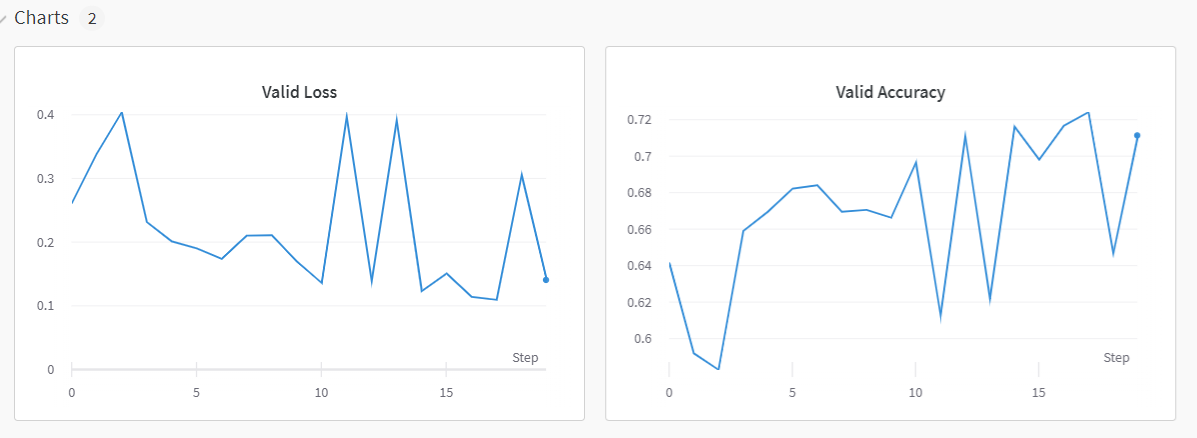

- 결과 : Train acc : 94%, Train loss : 0.05 || Valid acc : 72.41%, Valid loss: 0.11
- 리더보드 결과 16% (Test.py 수정 전)
- 원래 모델로 실험한 결과와 비교했을떄, 해당 실험의 Validation accuracy가 조금 더 낮아서 원래 모델로 진행하기로 했다.

### 05 Kfold

현재까지의 실험 중에서 가장 결과가 좋았던 모델을 사용했으며, fold 수는 3으로 설정했다.

모델: ResNet50, epochs:30, criterion:focal, optimizer:Adam

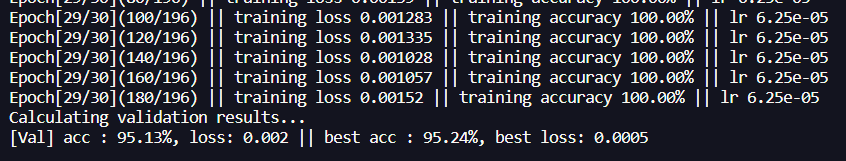

- 돌렸던 모델 중에서 Validation accuracy, loss가 가장 좋았다.
- 리더보드에 올려보니까 f1 : 0.6516, acc : 72.8889
- Kfold를 적용하지 않은 모델보다 리더보드에 올렸을 때의 성능이 좋지만, validation acc만큼의 성능을 내지 못한다.

### 06 Kfold Epoch 10

train/valid dataset에 과적합이 일어난 것으로 보이고 Epoch 수가 필요이상으로 높았다고 생각되어 10으로 줄이기로 했다.

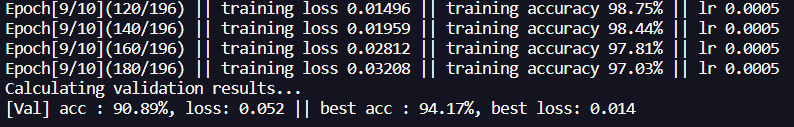

예상과 달리 Epoch 30일때에 비해 낮은 수치를 보인다 

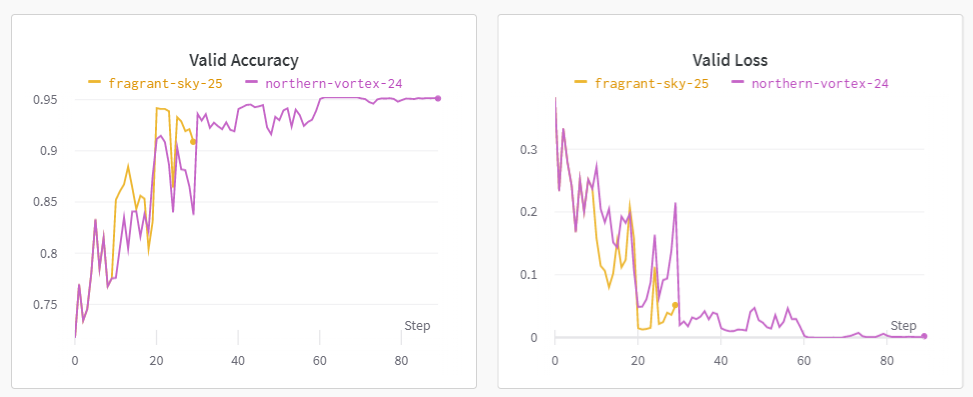

위의 그래프에서 노란색 그래프가 Epoch = 10, 핑크색 그래프가 Epoch = 30일 때이다. 두 그래프 모두 비슷한 형태의 불안정한 분포를 가진다. Epoch = 30일때보다 성능이 더 나을 거라고 생각되진 않아서 리더보드에 올리진 않기로 했다

### 07 Stratified K-Fold

코드구현에 실패했다ㅠㅇㅠ

### 08 Label 바꾸기

- 60세 이상 데이터가 너무 적다는 부분을 보완하기 위해 55세 이상으로 그룹을 늘려보았다.
- 비교를 위해 진행했던 가장 기본적인 실험 조건으로 진행하기로 했다. 조건은 아래와 같다. 
- 모델: ResNet50, Epochs: epochs30, Criterion: focal, optimizer: Adam (그 외는 default)

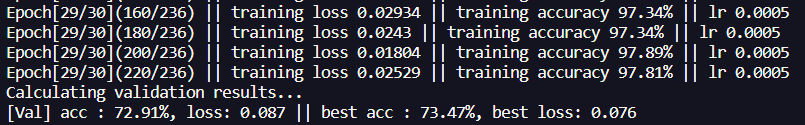

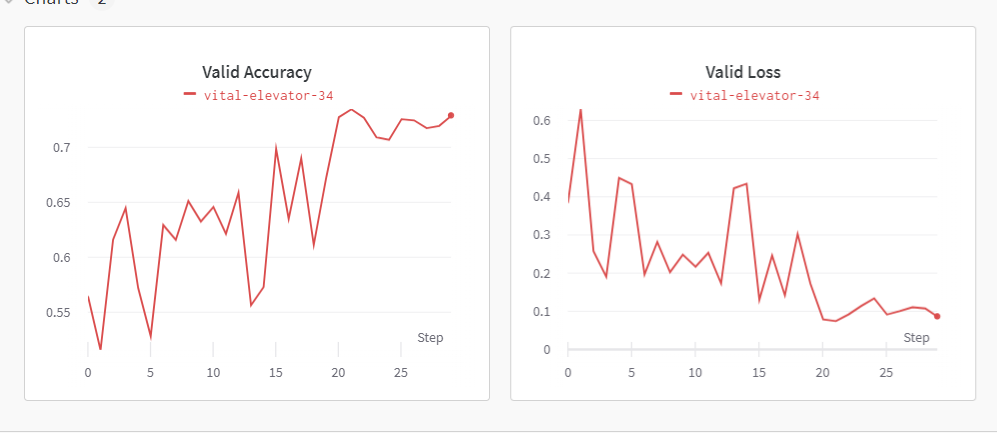

원래 데이터로 설정했을 때(아래 그래프)와 비교해보면 라벨을 바꿨을 때(위 그래프)의 학습이 더 불안정하다고 느껴진다. Validataion accuracy도 원래 데이터로 실험했을 때가 더 좋은 만큼 원래 데이터로 학습하는 것이 좋을 것 같다.

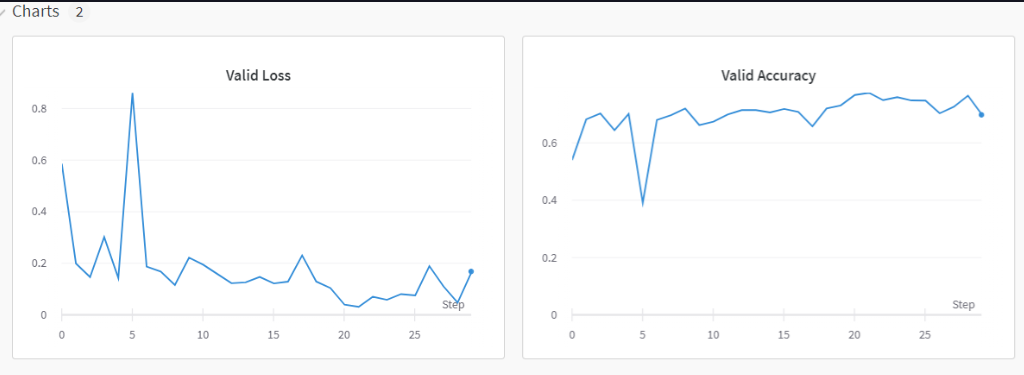

### 최종 모델

현재까지 실행한 ResNet50 모델 중에서 가장 좋은 성능을 보였던 것은 05 KFold를 적용한 모델이며 파라미터는 아래와 같다

{ augmentation='BaseAugmentation', batch_size=64, 
criterion='focal', data_dir='../input/data/train/images', dataset='MaskBaseDataset', 
epochs=30, log_interval=20, lr=0.001, lr_decay_step=20, 
model='ResNet50', model_dir='./model', name='resnet50_epoch30_kfold3', 
optimizer='Adam', resize=[128, 96], seed=42, val_ratio=0.2, valid_batch_size=1000 }